In [3]:
import numpy as np
import pandas as pd  

In [62]:
full_df = pd.read_csv("/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/full_df.csv")
#df_Vestland = pd.read_csv('/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/time series model/vestland.csv')
#df_Trøndelag = pd.read_csv('/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/time series model/trøndelag.csv')
#df_Nordland = pd.read_csv('/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/time series model/nordland.csv')
#df_Rogaland = pd.read_csv("/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/time series model/rogaland.csv")
#df_Møre_og_Romsdal = pd.read_csv('/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/time series model/møre_og_romsdal.csv')
#df_Troms_og_Finnmark = pd.read_csv('/Users/kris/Library/CloudStorage/OneDrive-Personal/Data science/big data project/time series model/troms_og_finnmark.csv')

In [ ]:

# Filter the DataFrame to exclude rows after week 20 in 2024
full_df = full_df[~((full_df['Year'] == 2024) & (full_df['Week'] > 8))]

In [64]:
full_df

,Year,Week,County,Sea temperature,Week_Lice_Counts,Duration,Outbreak_Count
0,2012,1,Møre og Romsdal,7.176923,1.351515,0.000000,0.000000
1,2012,1,Nordland,6.328214,2.872333,21.266667,0.066667
2,2012,1,Rogaland,7.680345,3.713333,0.000000,0.000000
3,2012,1,Troms og Finnmark,5.902917,1.657143,38.095238,0.142857
4,2012,1,Trøndelag,6.815918,1.562727,0.000000,0.000000
...,...,...,...,...,...,...,...
3787,2024,8,Nordland,3.930526,1.427931,0.775862,1.655172
3788,2024,8,Rogaland,5.950000,3.516923,7.641026,12.230769
3789,2024,8,Troms og Finnmark,3.052615,2.117500,0.000000,0.000000
3790,2024,8,Trøndelag,6.165926,1.120000,7.557540,6.083333


In [21]:
# Create DataFrame
df = pd.DataFrame(full_df)

# Group by 'County'
grouped = df.groupby('County')

# Create separate DataFrames for each county
for county, group in grouped:
    globals()[f"df_{county.replace(' ', '_')}"] = group.reset_index(drop=True)

In [22]:
df_Vestland

,Year,Week,County,Sea temperature,Week_Lice_Counts,Duration,Outbreak_Count
0,2012,1,Vestland,7.368732,3.952466,0.000000,0.000000
1,2012,2,Vestland,7.254574,6.223699,0.000000,0.000000
2,2012,3,Vestland,7.195362,2.520548,0.000000,0.000000
3,2012,4,Vestland,6.582000,6.339863,0.000000,0.000000
4,2012,5,Vestland,5.940702,1.995205,0.000000,0.000000
...,...,...,...,...,...,...,...
627,2024,4,Vestland,6.092185,2.573881,2.790448,3.597015
628,2024,5,Vestland,6.053108,2.455821,2.758085,3.611940
629,2024,6,Vestland,5.528844,2.273881,2.642440,3.597015
630,2024,7,Vestland,5.476944,2.324478,2.642440,3.567164


<ipython-input-36-afa267147127>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numeric.corr()


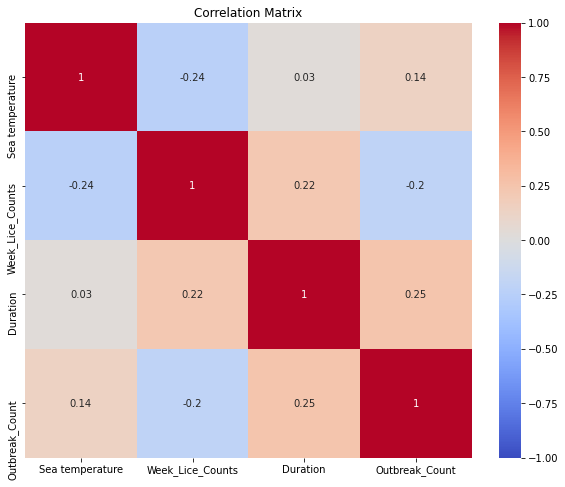

In [36]:
df = pd.DataFrame(df_Vestland)

# Drop date-related columns and non-numeric columns
df_numeric = df.drop(columns=['Year', 'Week', 'County'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


##  prepare data for time series

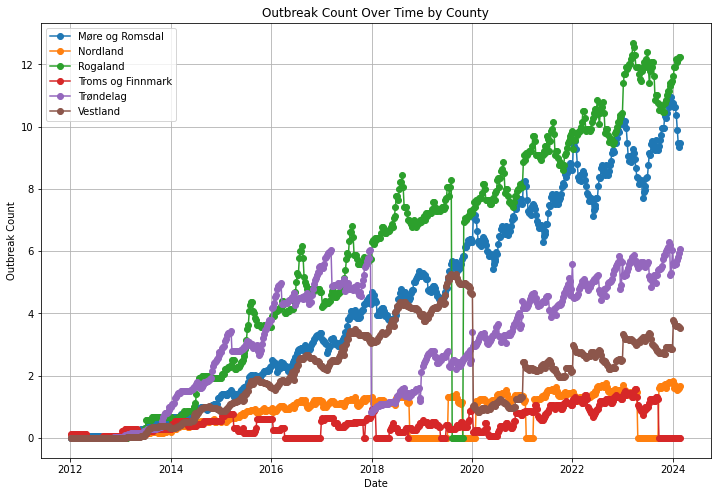

In [27]:
df = pd.DataFrame(full_df)

# Convert 'Year' and 'Week' to a datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Week'].astype(str) + '0', format='%Y%W%w')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Plot the Outbreak_Count over time for each county
plt.figure(figsize=(12, 8))

# Group the data by 'County'
for county, county_df in df.groupby('County'):
    plt.plot(county_df.index, county_df['Outbreak_Count'], marker='o', linestyle='-', label=county)

plt.title('Outbreak Count Over Time by County')
plt.xlabel('Date')
plt.ylabel('Outbreak Count')
plt.legend()
plt.grid(True)
plt.show()

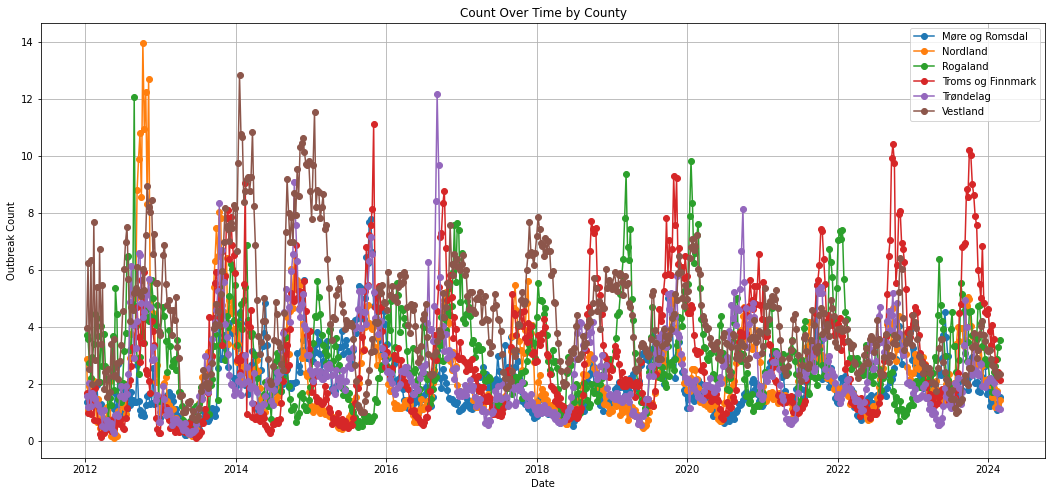

In [30]:
df = pd.DataFrame(full_df)

# Convert 'Year' and 'Week' to a datetime column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Week'].astype(str) + '0', format='%Y%W%w')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Ensure the data is sorted by date
df.sort_index(inplace=True)

# Plot the Outbreak_Count over time for each county
plt.figure(figsize=(18, 8))

# Group the data by 'County'
for county, county_df in df.groupby('County'):
    plt.plot(county_df.index, county_df['Week_Lice_Counts'], marker='o', linestyle='-', label=county)

plt.title('Count Over Time by County')
plt.xlabel('Date')
plt.ylabel('Outbreak Count')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create distribution plots for each county
# Create separate distribution plots for each county
counties = df['County'].unique()

for county in counties:
    plt.figure(figsize=(10, 6))
    subset = df[df['County'] == county]
    sns.histplot(subset['Outbreak_Count'], kde=True, bins=10)
    plt.title(f'Distribution of Outbreak Count for {county}')
    plt.xlabel('Outbreak Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Data transformation for time series, stationarity, seasonaility etc. 

In [161]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.DataFrame(full_df)

# Sort by 'Year' and 'Week' to ensure proper ordering
df = df.sort_values(by=['Year', 'Week', 'County'])

# One-hot encode the 'County' column
encoder = OneHotEncoder()
encoded_counties = encoder.fit_transform(df[['County']]).toarray()
encoded_county_df = pd.DataFrame(encoded_counties, columns=encoder.get_feature_names_out(['County']), index=df.index)
df = df.join(encoded_county_df).drop(columns=['County'])

# Check for stationarity
result = adfuller(df['Outbreak_Count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If the series is not stationary, apply differencing
if result[1] > 0.05:
    df['Outbreak_Count'] = df['Outbreak_Count'].diff().dropna()
    df = df.dropna()  # Ensure dropping NaNs after differencing


ADF Statistic: -0.7388588709958746
p-value: 0.8364258831495763


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Sea temperature', 'Week_Lice_Counts', 'Duration']])
df[['Sea temperature', 'Week_Lice_Counts', 'Duration']] = scaled_features

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [120]:
df.to_csv("sarimax_df.csv",index = False)

In [163]:
df

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Year,Week,Sea temperature,Week_Lice_Counts,Duration,Outbreak_Count,County_Møre og Romsdal,County_Nordland,County_Rogaland,County_Troms og Finnmark,County_Trøndelag,County_Vestland
1,2012,1,-0.761118,0.023918,0.601060,0.066667,0.0,1.0,0.0,0.0,0.0,0.0
2,2012,1,-0.373429,0.476820,-1.012317,-0.066667,0.0,0.0,1.0,0.0,0.0,0.0
3,2012,1,-0.883061,-0.630495,1.877744,0.142857,0.0,0.0,0.0,1.0,0.0,0.0
4,2012,1,-0.621281,-0.681340,-1.012317,-0.142857,0.0,0.0,0.0,0.0,1.0,0.0
5,2012,1,-0.462776,0.605599,-1.012317,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3787,2024,8,-1.448593,-0.753931,-0.953457,-7.821018,0.0,1.0,0.0,0.0,0.0,0.0
3788,2024,8,-0.869561,0.371048,-0.432638,10.575597,0.0,0.0,1.0,0.0,0.0,0.0
3789,2024,8,-1.700312,-0.382580,-1.012317,-12.230769,0.0,0.0,0.0,1.0,0.0,0.0
3790,2024,8,-0.807650,-0.919761,-0.438971,6.083333,0.0,0.0,0.0,0.0,1.0,0.0


<Figure size 16560x1080 with 0 Axes>

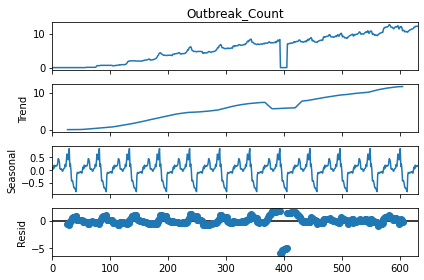

In [122]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series
decomposition = seasonal_decompose(df_Rogaland['Outbreak_Count'], model='additive', period=52)

# Plot the decomposition
plt.figure(figsize=(230, 15))
decomposition.plot(30,15)
plt.show()

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from pmdarima import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Create 'Date' column from 'Year' and 'Week'
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Week'].astype(str) + '1', format='%Y%W%w')

# Set the 'Date' column as index
df.set_index('Date', inplace=True)

# Ensure frequency is set (assuming weekly frequency)
df = df.asfreq('W-MON')

In [159]:
# Combine 'Year' and 'Week' into a single period index
df['Date'] = df['Year'].astype(str) + '-W' + df['Week'].astype(str)
df = df.set_index('Date')

# Sort the data
df = df.sort_index()

# Drop the Year and Week columns as they are now part of the index
df.drop(columns=['Year', 'Week'], inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [135]:

# Define target and exogenous variables
y = df['Outbreak_Count']
exog = df.drop(columns=['Outbreak_Count'])
# Split the data into train and test sets
y_train, y_test, X_train, X_test = temporal_train_test_split(y, exog, test_size=0.2)

y_train,y_val,X_train,X_val = temporal_train_test_split(y_train, X_train, test_size=0.2)

In [ ]:


# Convert 'Date' column to datetime, setting to the start of the week (Monday)
y_val['Date'] = pd.to_datetime(y_val['Date'] + '-1', format='%Y-W%W-%w')

# Set the 'Date' column as index
y_val.set_index('Date', inplace=True)

# Ensure frequency is set (assuming weekly frequency)
y_val = y_val.asfreq('W-MON')
